In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/BTC-USD/BTC-USD.csv


In [2]:
bitcoin = pd.read_csv('../input/BTC-USD/BTC-USD.csv',index_col='Date',parse_dates=True)


In [3]:
bitcoin.head()

Open          High           Low         Close  \
Date                                                                 
2022-01-03  47343.542969  47510.726563  45835.964844  46458.117188   
2022-01-04  46458.851563  47406.546875  45752.464844  45897.574219   
2022-01-05  45899.359375  46929.046875  42798.222656  43569.003906   
2022-01-06  43565.511719  43748.718750  42645.539063  43160.929688   
2022-01-07  43153.570313  43153.570313  41077.445313  41557.902344   

               Adj Close       Volume  
Date                                   
2022-01-03  46458.117188  33071628362  
2022-01-04  45897.574219  42494677905  
2022-01-05  43569.003906  36851084859  
2022-01-06  43160.929688  30208048289  
2022-01-07  41557.902344  84196607520

In [4]:
data = bitcoin.copy()
data['Buy']= np.zeros(len(data))
data['Sell']= np.zeros(len(data))

In [5]:
data['RollingMax'] = data['Close'].shift(1).rolling(window=28).max()
data['RollingMin'] = data['Close'].shift(1).rolling(window=28).min()
data.loc[data['RollingMax'] < data['Close'],'Buy'] = 1
data.loc[data['RollingMax'] > data['Close'],'Sell'] = -1

In [6]:
data.head()

Open          High           Low         Close  \
Date                                                                 
2022-01-03  47343.542969  47510.726563  45835.964844  46458.117188   
2022-01-04  46458.851563  47406.546875  45752.464844  45897.574219   
2022-01-05  45899.359375  46929.046875  42798.222656  43569.003906   
2022-01-06  43565.511719  43748.718750  42645.539063  43160.929688   
2022-01-07  43153.570313  43153.570313  41077.445313  41557.902344   

               Adj Close       Volume  Buy  Sell  RollingMax  RollingMin  
Date                                                                      
2022-01-03  46458.117188  33071628362  0.0   0.0         NaN         NaN  
2022-01-04  45897.574219  42494677905  0.0   0.0         NaN         NaN  
2022-01-05  43569.003906  36851084859  0.0   0.0         NaN         NaN  
2022-01-06  43160.929688  30208048289  0.0   0.0         NaN         NaN  
2022-01-07  41557.902344  84196607520  0.0   0.0         NaN         NaN

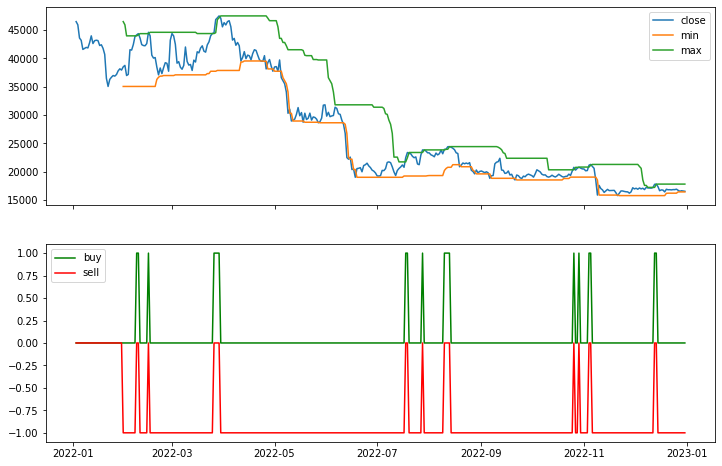

In [7]:
start='2022'
end='2022'
fig, ax = plt.subplots(2,figsize=(12,8),sharex=True)
ax[0].plot(data['Close'][start:end])
ax[0].plot(data['RollingMin'][start:end])
ax[0].plot(data['RollingMax'][start:end])
ax[0].legend(['close','min','max'])
ax[1].plot(data['Buy'][start:end], c='g')
ax[1].plot(data['Sell'][start:end], c='r')
ax[1].legend(['buy','sell'])